In [3]:
# correr desde la terminal el comando <pip install geopandas>
# correr desde la terminal el comando <pip install descartes>
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame as gdf
import pickle

## Descargando base de datos

In [59]:
ls

Bases_de_datos/          coloniascdmx.shp  GEDA.ipynb          shapes2/
cleandata_pickle.pickle  coloniascdmx.shx  limpiar_data.ipynb  src/
coloniascdmx.dbf         data/             README.md
coloniascdmx.prj         docs/             shapes/


In [60]:
cd ..

/home/paty/Documentos/Maestría/Intro/proyecto_1


In [61]:
cd proyecto_1_E3_intro_ds-main

/home/paty/Documentos/Maestría/Intro/proyecto_1/proyecto_1_E3_intro_ds-main


In [62]:
ls

Bases_de_datos/          coloniascdmx.shp  GEDA.ipynb          shapes2/
cleandata_pickle.pickle  coloniascdmx.shx  limpiar_data.ipynb  src/
coloniascdmx.dbf         data/             README.md
coloniascdmx.prj         docs/             shapes/


In [6]:
infile = open('cleandata_pickle.pickle','rb')
data_clean = pickle.load(infile)
infile.close()

In [7]:
colonias = gpd.read_file("coloniascdmx.shp")

In [39]:
ls

Bases_de_datos/          coloniascdmx.shp  GEDA.ipynb          shapes2/
cleandata_pickle.pickle  coloniascdmx.shx  limpiar_data.ipynb  src/
coloniascdmx.dbf         data/             README.md
coloniascdmx.prj         docs/             shapes/


In [40]:
cd shapes2

/home/paty/Documentos/Maestría/Intro/proyecto_1/proyecto_1_E3_intro_ds-main/shapes2


In [41]:
ls

alcaldias.dbf  alcaldias.prj  alcaldias.shp  alcaldias.shx


In [9]:
alcaldias = gpd.read_file("alcaldias.shp",encoding = 'utf-8')

## Creando dataframe con coordenadas

In [10]:
data_clean.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,dttm_creacion,dttm_cierre
1164271,C4/131231/03508,A,alvaro obregon,lesionado_atropellado,19.33929,-99.25598,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2013-12-31 23:21:38,2014-01-01 01:01:03
1164423,C4/131231/02371,N,alvaro obregon,accidente_choque_sin_lesionados,19.37831,-99.20090,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2013-12-31 18:21:47,2014-01-02 00:26:07
372612,C4/140101/04189,A,alvaro obregon,accidente_choque_con_lesionados,19.36336,-99.19104,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2014-01-01 21:45:43,2014-01-01 23:55:59
372622,C4/140101/04201,A,alvaro obregon,accidente_choque_sin_lesionados,19.36348,-99.19145,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2014-01-01 21:46:46,2014-01-01 21:53:16
372628,C4/140101/01293,A,alvaro obregon,accidente_choque_sin_lesionados,19.38161,-99.20009,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2014-01-01 06:50:48,2014-01-01 08:45:49


In [12]:
coord = data_clean.rename(columns = {'latitud': 'x', 'longitud': 'y'}, inplace=False)

In [13]:
type(coord)

pandas.core.frame.DataFrame

In [14]:
points= gdf(coord, geometry=gpd.points_from_xy(coord.y, coord.x))

In [15]:
points [:3]

,folio,codigo_cierre,delegacion_inicio,incidente_c4,x,y,clas_con_f_alarma,tipo_entrada,delegacion_cierre,dttm_creacion,dttm_cierre,geometry
1164271,C4/131231/03508,A,alvaro obregon,lesionado_atropellado,19.33929,-99.25598,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2013-12-31 23:21:38,2014-01-01 01:01:03,POINT (-99.25598 19.33929)
1164423,C4/131231/02371,N,alvaro obregon,accidente_choque_sin_lesionados,19.37831,-99.20090,EMERGENCIA,LLAMADA DEL 066,alvaro obregon,2013-12-31 18:21:47,2014-01-02 00:26:07,POINT (-99.20090 19.37831)
372612,C4/140101/04189,A,alvaro obregon,accidente_choque_con_lesionados,19.36336,-99.19104,URGENCIAS MEDICAS,LLAMADA DEL 066,alvaro obregon,2014-01-01 21:45:43,2014-01-01 23:55:59,POINT (-99.19104 19.36336)


In [16]:
colonias.head(6)

,nombre,entidad,cve_alc,alcaldia,cve_col,secc_com,secc_par,geometry
0,LOMAS DE CHAPULTEPEC,9.0,16.0,MIGUEL HIDALGO,16-042,"4924, 4931, 4932, 4935, 4936, 4940, 4987","4923, 4937, 4938, 4939, 4942","POLYGON ((-99.22017 19.42803, -99.22009 19.428..."
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),9.0,16.0,MIGUEL HIDALGO,16-044,4963,4964,"POLYGON ((-99.22967 19.41406, -99.22970 19.413..."
2,DEL BOSQUE (POLANCO),9.0,16.0,MIGUEL HIDALGO,16-026,None,"4918, 4919","POLYGON ((-99.20821 19.43282, -99.20813 19.432..."
3,PEDREGAL DE SANTA URSULA I,9.0,3.0,COYOACAN,03-135,"433, 500, 431, 513, 501","424, 425, 426, 430, 499","POLYGON ((-99.14587 19.31979, -99.14579 19.319..."
4,AJUSCO I,9.0,3.0,COYOACAN,03-128,"376, 377, 378, 379, 404, 493, 498",374,"POLYGON ((-99.15854 19.33038, -99.15785 19.329..."
5,VISTAS DEL MAUREL (U HAB),9.0,3.0,COYOACAN,03-124,477,None,"POLYGON ((-99.17469 19.30575, -99.17470 19.305..."


In [17]:
alcaldias

,nomgeo,cve_mun,cve_ent,cvegeo,municipio,geometry
0,Milpa Alta,009,09,09009,9,"POLYGON ((-98.99723 19.22731, -98.99745 19.227..."
1,Benito Juárez,014,09,09014,14,"POLYGON ((-99.13679 19.40156, -99.13682 19.401..."
2,Gustavo A. Madero,005,09,09005,5,"POLYGON ((-99.11860 19.58446, -99.11691 19.581..."
3,Coyoacán,003,09,09003,3,"POLYGON ((-99.13923 19.35687, -99.13772 19.356..."
4,Miguel Hidalgo,016,09,09016,16,"POLYGON ((-99.19058 19.46794, -99.19066 19.465..."
5,La Magdalena Contreras,008,09,09008,8,"POLYGON ((-99.20859 19.33610, -99.20867 19.335..."
6,Tláhuac,011,09,09011,11,"POLYGON ((-98.97893 19.32393, -98.97856 19.323..."
7,Azcapotzalco,002,09,09002,2,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
8,Iztacalco,006,09,09006,6,"POLYGON ((-99.05584 19.42196, -99.05589 19.421..."
9,Álvaro Obregón,010,09,09010,10,"POLYGON ((-99.18871 19.39475, -99.18868 19.394..."


## Explorando los datos

<AxesSubplot:>

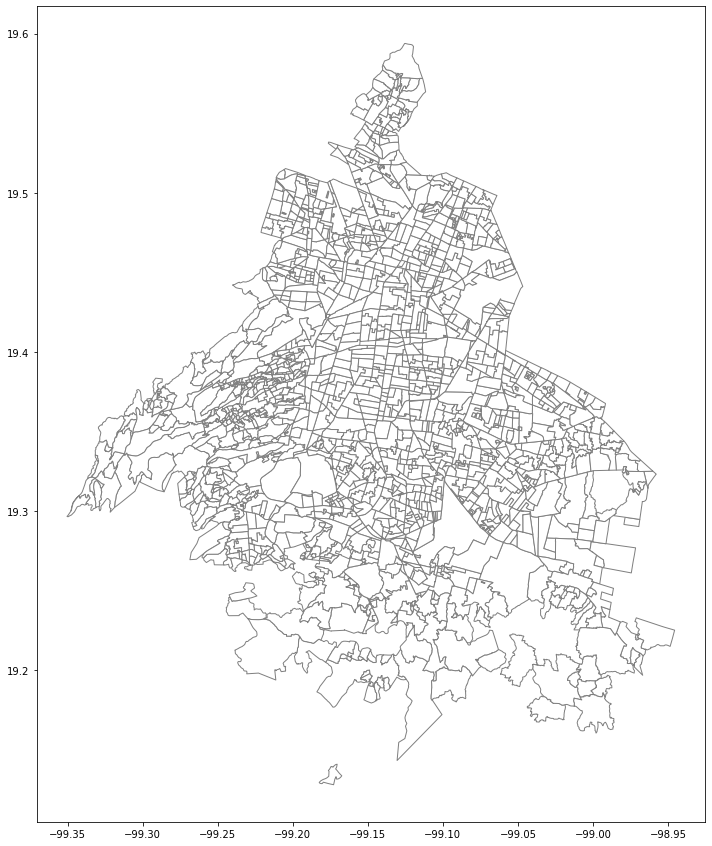

In [18]:
fig, ax = plt.subplots(figsize = (15,15))
colonias.plot(ax=ax,color='white', edgecolor='gray')

<AxesSubplot:>

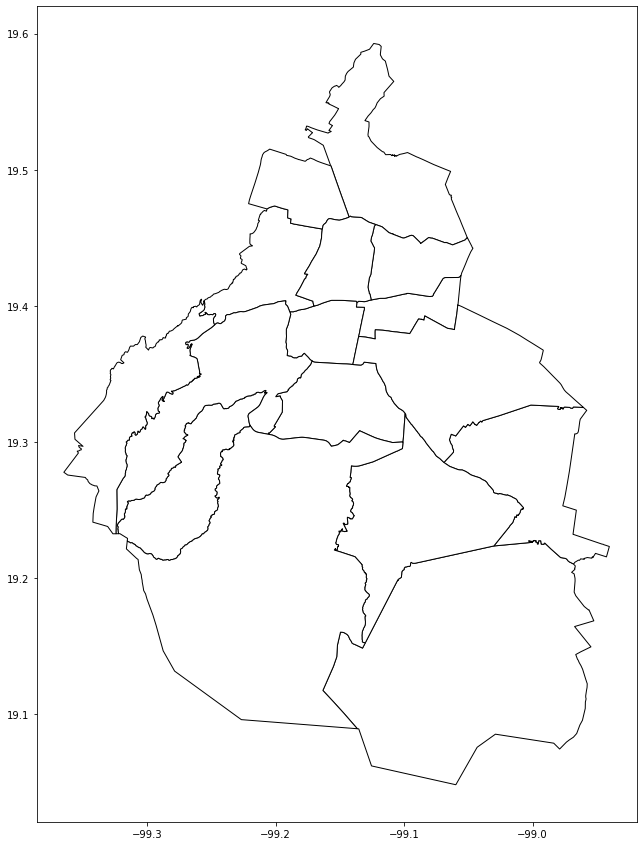

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
alcaldias.plot(ax=ax,color='white', edgecolor='black')

<AxesSubplot:>

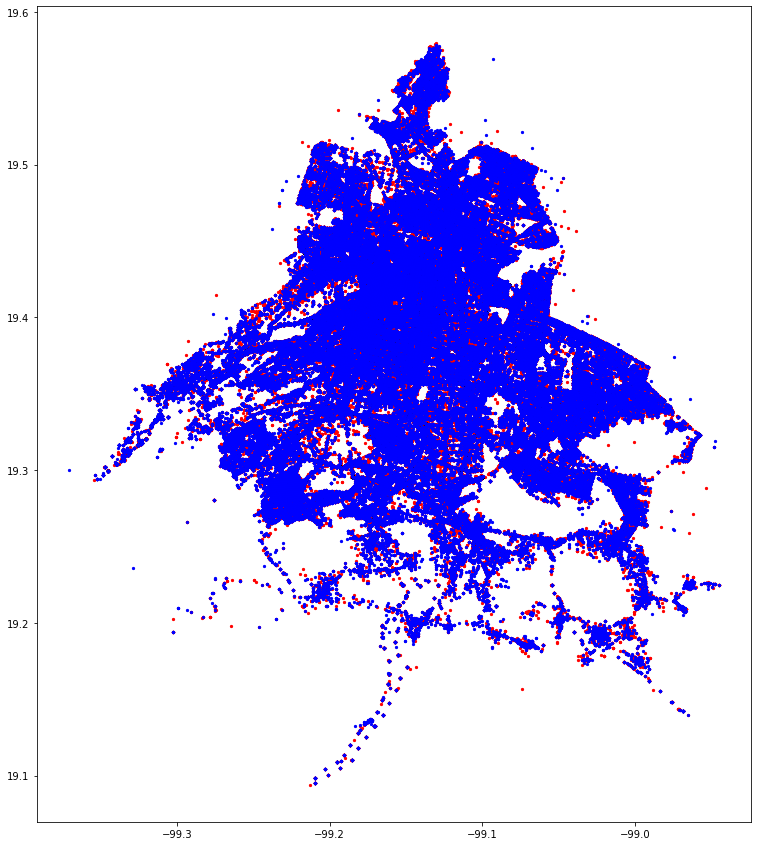

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
points[points["codigo_cierre"]=="A"].plot(ax=ax, markersize=5, color="red", marker="o", label="verdaderas")
points[points["codigo_cierre"]=="N"].plot(ax=ax, markersize=5, color="blue", marker="o", label="falsas")

## Uniendo la información 

In [21]:
alcaldias['coords'] = alcaldias['geometry'].apply(lambda x: x.representative_point().coords[:])
alcaldias['coords'] = [coords[0] for coords in alcaldias['coords']]## Calcula punto dentro de los poliginos para colocar nombre de la delegacion

/home/paty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if __name__ == '__main__':


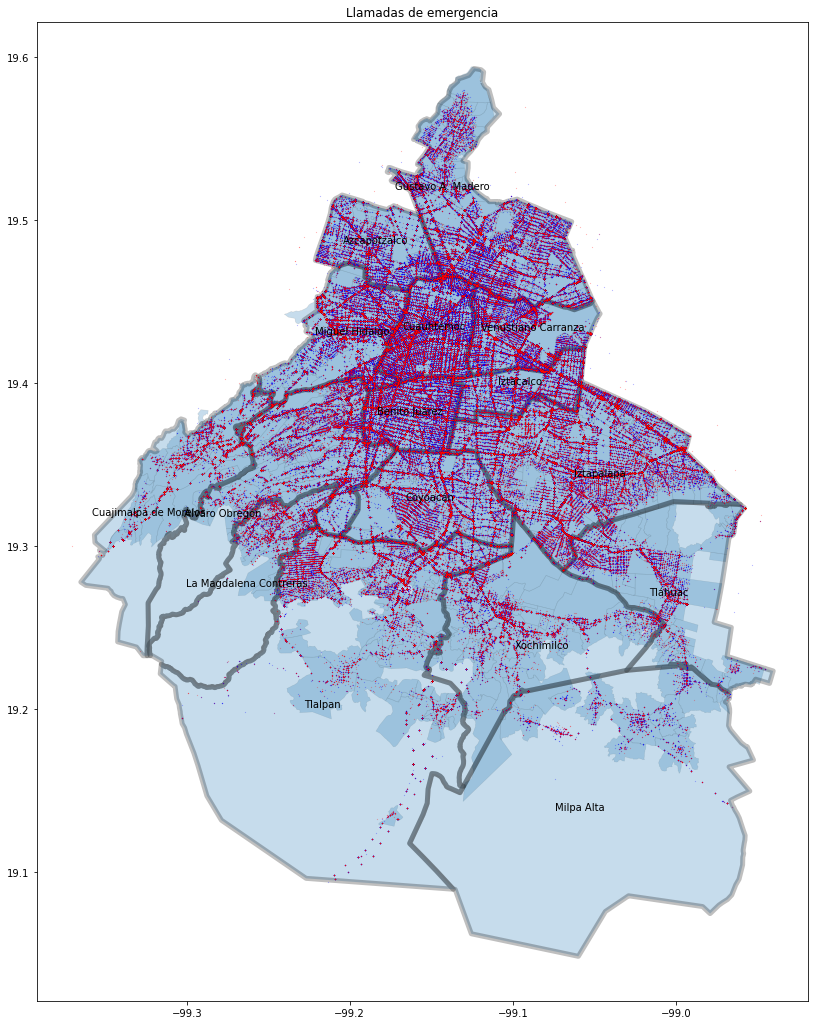

In [22]:
fig, ax = plt.subplots(figsize = (18,18))
colonias.plot(ax=ax, edgecolor='gray',linewidth=.5,alpha=0.25)
alcaldias.plot(ax=ax, edgecolor='black', linewidth=5,alpha=0.25)
points[points["codigo_cierre"]=="A"].plot(ax=ax, markersize=.01, color="blue", marker="o", label="Verdaderas")
points[points["codigo_cierre"]=="N"].plot(ax=ax, markersize=.01, color="red", marker="o", label="Falsas")
plt.title("Llamadas de emergencia")
for idx, row in alcaldias.iterrows():
    plt.annotate(s=row['nomgeo'], xy=row['coords'],
                 horizontalalignment='center')
plt.savefig('mapa.png')